In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [2]:
from pyspark import SparkContext
sc = SparkContext(master="local[4]")
sc.version

'2.3.0'

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType, BinaryType

sqlContext = SQLContext(sc)
sqlContext

In [136]:
import pyspark.sql.functions as F

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSV Reader").getOrCreate()
df1 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("escape", "\"").load("merged_data.csv")

In [5]:
df2 = df1.dropna("any")
df2.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|
+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---

In [6]:
#adjust data types 

In [7]:
df2 = df2.withColumn("streams", df1["streams"].cast("Integer"))
df2 = df2.withColumn("popularity", df1["popularity"].cast("Integer"))
df2 = df2.withColumn("duration_ms", df1["duration_ms"].cast("Integer"))

In [131]:
df2.select("streams", "popularity", "duration_ms").describe().show()

+-------+-----------------+------------------+------------------+
|summary|          streams|        popularity|       duration_ms|
+-------+-----------------+------------------+------------------+
|  count|           881194|            881194|            881194|
|   mean|51662.10985322188|41.246040032047425|216176.87010465347|
| stddev|199992.0502176531| 32.81812068147051| 56106.56857221959|
|    min|             1001|                 0|                 0|
|    max|          7985803|                90|           9318296|
+-------+-----------------+------------------+------------------+



In [132]:
#numerical af values set 1
df2.select("af_danceability", "af_energy", "af_key", "af_loudness", "af_mode", "af_speechiness").describe().show()

+-------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+
|summary|    af_danceability|          af_energy|            af_key|       af_loudness|            af_mode|     af_speechiness|
+-------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+
|  count|             881194|             881194|            881194|            881194|             881194|             881194|
|   mean| 0.6816865531313122| 0.6609642107186692| 5.312490779555921|-5.930670455086607| 0.5858766628006999| 0.1036562745547574|
| stddev|0.13055459839922265|0.16170317860580066|3.6720516324479893|2.2369797982472805|0.49257027328432845|0.09284140512009223|
|    min|             0.0645|             0.0107|                 0|           -31.042|                  0|              0.022|
|    max|               0.98|              0.999|                11|             1.509|                 

In [133]:
df2.select("af_acousticness", "af_instrumentalness", "af_liveness", "af_valence", "af_tempo", "af_time_signature").describe().show()

+-------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+
|summary|    af_acousticness| af_instrumentalness|        af_liveness|         af_valence|          af_tempo| af_time_signature|
+-------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+
|  count|             881194|              881194|             881194|             881194|            881194|            881194|
|   mean|0.22777686138974462|0.007402772556520002| 0.1666076523444272| 0.5157139318924048|120.42735367127528|3.9799726280478533|
| stddev|0.23103506875657026| 0.06087904450319127|0.12424479466780335|0.22296872218563127| 29.21653759331071|0.2283049545989595|
|    min|             8.8E-6|                 0.0|             0.0176|             0.0306|            31.262|                 1|
|    max|              0.992|               0.987|              0.993|              0.989|       

In [137]:
df2.groupBy("region").count().sort(F.col("count").desc()).show()

+-----------+-----+
|     region|count|
+-----------+-----+
|  Argentina|18601|
|  Australia|18600|
|    Austria|18472|
|    Belgium|18400|
|     Brazil|18396|
|     Canada|18326|
|    Ecuador|18202|
| Costa Rica|18201|
|    Denmark|18200|
|     France|18200|
|      Chile|18200|
|   Colombia|18200|
|    Finland|18200|
|     Global|18200|
|    Germany|18071|
|  Hong Kong|17893|
|  Indonesia|17802|
|    Ireland|17801|
|     Norway|17800|
|New Zealand|17800|
+-----------+-----+
only showing top 20 rows



In [138]:
#show for top 10 regions only
df2.groupBy("region").count().sort(F.col("count").desc()).show(10)

+----------+-----+
|    region|count|
+----------+-----+
| Argentina|18601|
| Australia|18600|
|   Austria|18472|
|   Belgium|18400|
|    Brazil|18396|
|    Canada|18326|
|   Ecuador|18202|
|Costa Rica|18201|
|    France|18200|
|   Denmark|18200|
+----------+-----+
only showing top 10 rows



In [140]:
#group by artists that occur most frequently
df2.groupBy("artist").count().sort(F.col("count").desc()).show()

+-----------------+-----+
|           artist|count|
+-----------------+-----+
|       Ed Sheeran|20479|
|      Post Malone| 9921|
|            Drake| 8693|
|       The Weeknd| 8136|
|         Dua Lipa| 7503|
|       Bruno Mars| 7020|
|     Shawn Mendes| 6825|
|  Imagine Dragons| 6369|
| The Chainsmokers| 5853|
|     Charlie Puth| 5630|
|   Camila Cabello| 5609|
|            Ozuna| 5598|
|        Bad Bunny| 5301|
|    Justin Bieber| 5284|
|           Maluma| 5137|
|     Clean Bandit| 4845|
|Twenty One Pilots| 4792|
|              Sia| 4635|
|      Major Lazer| 4579|
|   Kendrick Lamar| 4449|
+-----------------+-----+
only showing top 20 rows



In [141]:
#group by top 10 artists that occur most frequently
df2.groupBy("artist").count().sort(F.col("count").desc()).show(10)

+----------------+-----+
|          artist|count|
+----------------+-----+
|      Ed Sheeran|20479|
|     Post Malone| 9921|
|           Drake| 8693|
|      The Weeknd| 8136|
|        Dua Lipa| 7503|
|      Bruno Mars| 7020|
|    Shawn Mendes| 6825|
| Imagine Dragons| 6369|
|The Chainsmokers| 5853|
|    Charlie Puth| 5630|
+----------------+-----+
only showing top 10 rows



In [142]:
#return unique trend types and record counts of each
df2.groupBy("trend").count().sort(F.col("count").desc()).show()

+-------------+------+
|        trend| count|
+-------------+------+
|    MOVE_DOWN|387450|
|      MOVE_UP|338921|
|SAME_POSITION|101845|
|    NEW_ENTRY| 52978|
+-------------+------+



In [143]:
#return records for af time signature
df2.groupBy("af_time_signature").count().sort(F.col("count").desc()).show()

+-----------------+------+
|af_time_signature| count|
+-----------------+------+
|                4|848342|
|                3| 21892|
|                5|  9281|
|                1|  1679|
+-----------------+------+



In [144]:
#return record counts for explicit content
df2.groupBy("explicit").count().sort(F.col("count").desc()).show()

+--------+------+
|explicit| count|
+--------+------+
|   false|656785|
|    true|224409|
+--------+------+



In [145]:
#return records for af mode
df2.groupBy("af_mode").count().sort(F.col("count").desc()).show()

+-------+------+
|af_mode| count|
+-------+------+
|      1|516271|
|      0|364923|
+-------+------+



In [146]:
df2.groupBy("artist", "title").count().sort(F.col("count").desc()).show(10)

+--------------------+--------------------+-----+
|              artist|               title|count|
+--------------------+--------------------+-----+
|          Ed Sheeran|        Shape of You| 4021|
|        James Arthur|Say You Won't Let Go| 3006|
|The Chainsmokers,...|              Closer| 2919|
|          Ed Sheeran|   Thinking out Loud| 2798|
|          Ed Sheeran|          Photograph| 2740|
|     Imagine Dragons|            Believer| 2715|
| Drake, WizKid, Kyla|           One Dance| 2579|
|  ZAYN, Taylor Swift|I Don’t Wanna Liv...| 2544|
|          Ed Sheeran|             Perfect| 2303|
|        Clean Bandit|Rockabye (feat. S...| 2273|
+--------------------+--------------------+-----+
only showing top 10 rows



In [147]:
df3 = df2.filter(F.col("artist")=="Drake")
df3.groupBy("artist", "title").count().sort(F.col("count").desc()).show(10)

+------+--------------------+-----+
|artist|               title|count|
+------+--------------------+-----+
| Drake|          God's Plan| 2249|
| Drake|           Fake Love| 1641|
| Drake|        Toosie Slide|  970|
| Drake|       Nice For What|  485|
| Drake|           Controlla|  450|
| Drake|Chicago Freestyle...|  404|
| Drake|Pain 1993 (with P...|  374|
| Drake|        Passionfruit|  311|
| Drake|       Hotline Bling|  267|
| Drake|Money In The Grav...|  182|
+------+--------------------+-----+
only showing top 10 rows



In [148]:
df3.groupBy("artist", "region").count().sort(F.col("count").desc()).show(10)

+------+--------------+-----+
|artist|        region|count|
+------+--------------+-----+
| Drake|        Canada|  458|
| Drake| United States|  412|
| Drake|     Australia|  316|
| Drake|        Global|  314|
| Drake|United Kingdom|  309|
| Drake|       Ireland|  276|
| Drake|   New Zealand|  257|
| Drake|      Portugal|  248|
| Drake|   Switzerland|  200|
| Drake|       Belgium|  194|
+------+--------------+-----+
only showing top 10 rows



In [149]:
df3.agg({"title": "approx_count_distinct"}).show()

+----------------------------+
|approx_count_distinct(title)|
+----------------------------+
|                          28|
+----------------------------+



In [150]:
df4 = df2.filter(F.col("artist")=="Post Malone")
df4.groupBy("artist", "title").count().sort(F.col("count").desc()).show(10)

+-----------+--------------------+-----+
|     artist|               title|count|
+-----------+--------------------+-----+
|Post Malone|Psycho (feat. Ty ...| 1489|
|Post Malone|        I Fall Apart| 1222|
|Post Malone|             Circles|  826|
|Post Malone|rockstar (feat. 2...|  763|
|Post Malone|         Candy Paint|  705|
|Post Malone|             Go Flex|  518|
|Post Malone|          Better Now|  486|
|Post Malone|       White Iverson|  437|
|Post Malone|            Paranoid|  349|
|Post Malone|Spoil My Night (f...|  299|
+-----------+--------------------+-----+
only showing top 10 rows



In [151]:
#return the regions where post malone occurs most frequently on a top list 
df4.groupBy("artist", "region").count().sort(F.col("count").desc()).show(10)

+-----------+--------------+-----+
|     artist|        region|count|
+-----------+--------------+-----+
|Post Malone|        Canada|  500|
|Post Malone| United States|  474|
|Post Malone|     Australia|  404|
|Post Malone|        Global|  402|
|Post Malone|   New Zealand|  392|
|Post Malone|       Ireland|  360|
|Post Malone|        Norway|  320|
|Post Malone|       Denmark|  317|
|Post Malone|United Kingdom|  316|
|Post Malone|        Sweden|  291|
+-----------+--------------+-----+
only showing top 10 rows



In [152]:
#count unique post malone songs that appear in these top lists
df4.agg({"title": "approx_count_distinct"}).show()

+----------------------------+
|approx_count_distinct(title)|
+----------------------------+
|                          30|
+----------------------------+



In [153]:
df5 = df2.filter(F.col("region")=="United States")
df5.groupBy("artist", "region").count().sort(F.col("count").desc()).show(10)

+--------------+-------------+-----+
|        artist|       region|count|
+--------------+-------------+-----+
|   Post Malone|United States|  474|
|    The Weeknd|United States|  413|
|         Drake|United States|  412|
|       J. Cole|United States|  381|
|         Migos|United States|  346|
|  XXXTENTACION|United States|  342|
|  Lil Uzi Vert|United States|  339|
|Kendrick Lamar|United States|  226|
|  Travis Scott|United States|  216|
|    Ed Sheeran|United States|  215|
+--------------+-------------+-----+
only showing top 10 rows



In [154]:
#top 10 referenced artists in canada
df6 = df2.filter(F.col("region")=="Canada")
df6.groupBy("artist", "region").count().sort(F.col("count").desc()).show(10)

+--------------+------+-----+
|        artist|region|count|
+--------------+------+-----+
|   Post Malone|Canada|  500|
|    The Weeknd|Canada|  469|
|         Drake|Canada|  458|
|    Ed Sheeran|Canada|  449|
|         Migos|Canada|  304|
|  XXXTENTACION|Canada|  246|
|       J. Cole|Canada|  228|
|Kendrick Lamar|Canada|  227|
|  Travis Scott|Canada|  214|
|    Tory Lanez|Canada|  208|
+--------------+------+-----+
only showing top 10 rows



In [155]:
#top 10 referenced artists for mexico
df7 = df2.filter(F.col("region")=="Mexico")
df7.groupBy("artist", "region").count().sort(F.col("count").desc()).show(10)

+--------------------+------+-----+
|              artist|region|count|
+--------------------+------+-----+
|Banda MS de Sergi...|Mexico|  417|
|              Maluma|Mexico|  384|
|               Ozuna|Mexico|  308|
|          Ed Sheeran|Mexico|  285|
|     Cartel De Santa|Mexico|  284|
|           Bad Bunny|Mexico|  273|
|            J Balvin|Mexico|  257|
|     Christian Nodal|Mexico|  246|
|         Luis Miguel|Mexico|  237|
|                Reik|Mexico|  184|
+--------------------+------+-----+
only showing top 10 rows



In [156]:
#top 10 most referenced songs in america
df5.groupBy("artist", "title", "region").count().sort(F.col("count").desc()).show(10)

+-------------------+--------------------+-------------+-----+
|             artist|               title|       region|count|
+-------------------+--------------------+-------------+-----+
|       Travis Scott|          goosebumps|United States|   86|
|            J. Cole|      No Role Modelz|United States|   84|
| Post Malone, Quavo|     Congratulations|United States|   82|
|       James Arthur|Say You Won't Let Go|United States|   79|
|   Childish Gambino|             Redbone|United States|   74|
|        Post Malone|       White Iverson|United States|   72|
|Drake, WizKid, Kyla|           One Dance|United States|   72|
|        Post Malone|             Go Flex|United States|   72|
|             Khalid|            Location|United States|   71|
|               KYLE|iSpy (feat. Lil Y...|United States|   68|
+-------------------+--------------------+-------------+-----+
only showing top 10 rows



In [157]:
#top 10 referenced songs in canada
df6.groupBy("artist", "title", "region").count().sort(F.col("count").desc()).show(10)

+--------------------+--------------------+------+-----+
|              artist|               title|region|count|
+--------------------+--------------------+------+-----+
|        Travis Scott|          goosebumps|Canada|   92|
|        James Arthur|Say You Won't Let Go|Canada|   91|
|          Ed Sheeran|        Shape of You|Canada|   80|
|    Childish Gambino|             Redbone|Canada|   76|
| Drake, WizKid, Kyla|           One Dance|Canada|   76|
|         Post Malone|       White Iverson|Canada|   76|
|The Chainsmokers,...|              Closer|Canada|   74|
|            Sam Hunt|Body Like A Back ...|Canada|   72|
|   Eminem, Nate Dogg|    'Till I Collapse|Canada|   71|
|The Weeknd, Daft ...|             Starboy|Canada|   68|
+--------------------+--------------------+------+-----+
only showing top 10 rows



In [158]:
#top 10 referenced songs in mexico
df7.groupBy("artist", "title", "region").count().sort(F.col("count").desc()).show(10)

+--------------------+--------------------+------+-----+
|              artist|               title|region|count|
+--------------------+--------------------+------+-----+
|     Christian Nodal|          Adiós Amor|Mexico|   89|
|       León Larregui|             Brillas|Mexico|   89|
|         Luis Miguel|Ahora Te Puedes M...|Mexico|   89|
| Alejandro Fernández|Me Dediqué a Perd...|Mexico|   88|
|               Queen|Bohemian Rhapsody...|Mexico|   84|
|      Panteon Rococo|   La Dosis Perfecta|Mexico|   75|
|  Natalia Lafourcade|       Hasta la Raíz|Mexico|   74|
| IAmChino, El Chacal|Ay Mi Dios (feat....|Mexico|   74|
|Ozuna, Bad Bunny,...|Diles (feat. Arca...|Mexico|   74|
|                CNCO|Reggaetón Lento (...|Mexico|   74|
+--------------------+--------------------+------+-----+
only showing top 10 rows



In [159]:
#albums referenced the most frequenly
df2.groupBy("artist", "album").count().sort(F.col("count").desc()).show(10)

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Ed Sheeran|          ÷ (Deluxe)| 9894|
|          Ed Sheeran| x (Wembley Edition)| 6343|
|     Imagine Dragons|              Evolve| 5722|
|      Camila Cabello|              Camila| 5268|
|         Post Malone|beerbongs & bentleys| 4974|
|            Dua Lipa|   Dua Lipa (Deluxe)| 4866|
|          Bruno Mars|           24K Magic| 4431|
|The Weeknd, Daft ...|             Starboy| 4392|
|       Justin Bieber|    Purpose (Deluxe)| 3482|
|        Shawn Mendes|          Illuminate| 3365|
+--------------------+--------------------+-----+
only showing top 10 rows



In [160]:
#albums referenced the most frequenly in the united states
df5.groupBy("artist", "album").count().sort(F.col("count").desc()).show(10)

+--------------+--------------------+-----+
|        artist|               album|count|
+--------------+--------------------+-----+
|    The Weeknd|             Starboy|  240|
|         Migos|             Culture|  229|
|   Post Malone|     Stoney (Deluxe)|  209|
|      Big Sean|          I Decided.|  168|
|       J. Cole|    4 Your Eyez Only|  167|
|   Post Malone|beerbongs & bentleys|  154|
|Kendrick Lamar|               DAMN.|  148|
|  XXXTENTACION|                  17|  148|
|        Khalid|       American Teen|  137|
|  XXXTENTACION|                   ?|  136|
+--------------+--------------------+-----+
only showing top 10 rows



In [161]:
#albums referenced the most frequenly in canada
df6.groupBy("artist", "album").count().sort(F.col("count").desc()).show(10)

+--------------+--------------------+-----+
|        artist|               album|count|
+--------------+--------------------+-----+
|    The Weeknd|             Starboy|  290|
|   Post Malone|     Stoney (Deluxe)|  219|
|    Ed Sheeran|          ÷ (Deluxe)|  214|
|         Migos|             Culture|  197|
|   Post Malone|beerbongs & bentleys|  173|
|Kendrick Lamar|               DAMN.|  137|
|    Tory Lanez|  MEMORIES DON'T DIE|  135|
|      Big Sean|          I Decided.|  135|
|    Ed Sheeran| x (Wembley Edition)|  135|
|Camila Cabello|              Camila|  134|
+--------------+--------------------+-----+
only showing top 10 rows



In [162]:
#albums referenced the most frequenly in mexico
df7.groupBy("artist", "album").count().sort(F.col("count").desc()).show(10)

+--------------------+-------------------+-----+
|              artist|              album|count|
+--------------------+-------------------+-----+
|     Cartel De Santa|    Viejo Marihuano|  219|
|Banda MS de Sergi...|      Que Bendición|  204|
|               Ozuna|             Odisea|  192|
|             Shakira|          El Dorado|  160|
|     Christian Nodal|     Me Dejé Llevar|  141|
|          Ed Sheeran|         ÷ (Deluxe)|  139|
|          Ed Sheeran|x (Wembley Edition)|  127|
|           Nicky Jam|              Fénix|  125|
|            J Balvin|            Colores|  120|
|The Weeknd, Daft ...|            Starboy|  113|
+--------------------+-------------------+-----+
only showing top 10 rows



In [8]:
from pyspark.sql.functions import when
from pyspark.sql.functions import lit

In [9]:
#create new columns

In [10]:
df3 = df2.withColumn("contains_cussing", \
               when((df2.explicit == True), lit(1))\
               .otherwise(lit(0)))

In [11]:
df3.select("contains_cussing").show()

+----------------+
|contains_cussing|
+----------------+
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
+----------------+
only showing top 20 rows



In [12]:
df3 = df3.withColumn("popularity_increased", \
                    when((df3.trend == "MOVE_UP"), lit(1))\
                    .otherwise(lit(0)))

In [13]:
df3.select("popularity_increased").show()

+--------------------+
|popularity_increased|
+--------------------+
|                   0|
|                   1|
|                   0|
|                   0|
|                   1|
|                   0|
|                   0|
|                   0|
|                   1|
|                   0|
|                   0|
|                   1|
|                   1|
|                   0|
|                   0|
|                   1|
|                   1|
|                   0|
|                   0|
|                   0|
+--------------------+
only showing top 20 rows



In [14]:
df3 = df3.withColumn("popularity_decreased", \
                    when((df3.trend == "MOVE_DOWN"), lit(1))\
                    .otherwise(lit(0)))

In [15]:
df3.select("popularity_decreased").show()

+--------------------+
|popularity_decreased|
+--------------------+
|                   0|
|                   0|
|                   1|
|                   0|
|                   0|
|                   1|
|                   1|
|                   1|
|                   0|
|                   1|
|                   0|
|                   0|
|                   0|
|                   1|
|                   1|
|                   0|
|                   0|
|                   1|
|                   0|
|                   1|
+--------------------+
only showing top 20 rows



In [16]:
df3 = df3.withColumn("populairty_same", \
                    when((df3.trend == "SAME_POSITION"), lit(1))\
                    .otherwise(lit(0)))

In [17]:
df3.select("populairty_same").show()

+---------------+
|populairty_same|
+---------------+
|              1|
|              0|
|              0|
|              1|
|              0|
|              0|
|              0|
|              0|
|              0|
|              0|
|              1|
|              0|
|              0|
|              0|
|              0|
|              0|
|              0|
|              0|
|              1|
|              0|
+---------------+
only showing top 20 rows



In [18]:
df3 = df3.withColumn("new_entry", \
                    when((df3.trend == "NEW_ENTRY"), lit(1))\
                    .otherwise(lit(0))) 

In [19]:
df3.select("new_entry").show()

+---------+
|new_entry|
+---------+
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
+---------+
only showing top 20 rows



In [20]:
#normalize af acousticness 

In [21]:
from pyspark.sql.functions import col, min, max

In [22]:
af_acousticness_min = df3.select(min(col("af_acousticness"))).collect()[0][0]
af_acousticness_max = df3.select(max(col("af_acousticness"))).collect()[0][0]
df3_normalized = df3.withColumn("af_acousticness_normalized", (col("af_acousticness") - af_acousticness_min) / (af_acousticness_max - af_acousticness_min))

In [23]:
df3_normalized = df3.withColumn("af_acousticness_normalized", (col("af_acousticness") - af_acousticness_min) / (af_acousticness_max - af_acousticness_min))

In [24]:
df3_normalized.select("af_acousticness_normalized").show()

+--------------------------+
|af_acousticness_normalized|
+--------------------------+
|       0.18850086573348634|
|      0.004335925560629973|
|       0.40322051244002977|
|        0.5554396047061708|
|       0.07660471181599192|
|       0.14313756009125886|
|       0.08577818029030902|
|       0.05634243529579697|
|       0.19958967377936418|
|       0.10059686013343667|
|       0.02458812134623775|
|        0.1723716903940277|
|       0.13305682550409723|
|       0.06783447272516127|
|        0.5514073108713061|
|       0.11793572362335474|
|       0.08648383171141034|
|       0.07902408811691071|
|        0.1270083847518002|
|        0.2580579343849018|
+--------------------------+
only showing top 20 rows



In [25]:
#normalize af lousness

In [26]:
af_loudness_min = df3.select(min(col("af_loudness"))).collect()[0][0]
af_loudness_max = df3.select(max(col("af_loudness"))).collect()[0][0]
df3_normalized = df3.withColumn("af_loudness_normalized", (col("af_loudness") - af_loudness_min) / (af_loudness_max - af_loudness_min))

In [27]:
df3_normalized.select("af_loudness_normalized").show()

+----------------------+
|af_loudness_normalized|
+----------------------+
|    0.8639058707873798|
|    0.8286074160548063|
|    0.8592362753832448|
|    0.8196675985376793|
|    0.8237534945162974|
|    0.8020951737273817|
|    0.7334029676507634|
|    0.7868575466191514|
|    0.8876839421215938|
|    0.7483641055574329|
|    0.8976375533777764|
|    0.9309391416546342|
|    0.7728487604067464|
|    0.8302356302417745|
|    0.8360419034745477|
|    0.8475008448281159|
|    0.8536757703296365|
|    0.7905440693066265|
|    0.8250744984793095|
|    0.8545666799791096|
+----------------------+
only showing top 20 rows



In [28]:
#find clusters with best silhoute score 

In [29]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler 
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.feature import VectorAssembler

In [30]:
df3_normalized.show(3)

+---+--------------------+----+--------+------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+----------------+--------------------+--------------------+---------------+---------+----------------------+
|_c0|               title|rank|    date|      artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|contains_cussing|popularity_increased|popularity_decreased|populairty_same|new_entry|af_loudness_normalized|
+---+--------------------+----+-

In [31]:
cluster1 = df3_normalized.select("af_danceability", "af_energy", "af_loudness_normalized", "af_acousticness", "af_speechiness")

In [32]:
required_features = ["af_danceability", "af_energy", "af_loudness_normalized", "af_acousticness", "af_speechiness"]

In [33]:
assemblerC1 = VectorAssembler(inputCols=required_features, outputCol="features")
transformed_dataC1 = assemblerC1.transform(cluster1)
transformed_dataC1.show()

+---------------+---------+----------------------+---------------+--------------+--------------------+
|af_danceability|af_energy|af_loudness_normalized|af_acousticness|af_speechiness|            features|
+---------------+---------+----------------------+---------------+--------------+--------------------+
|          0.852|    0.773|    0.8639058707873798|          0.187|        0.0776|[0.852,0.773,0.86...|
|          0.663|     0.92|    0.8286074160548063|        0.00431|         0.226|[0.663,0.92,0.828...|
|          0.761|    0.838|    0.8592362753832448|            0.4|        0.0502|[0.761,0.838,0.85...|
|          0.508|    0.687|    0.8196675985376793|          0.551|         0.326|[0.508,0.687,0.81...|
|          0.899|    0.626|    0.8237534945162974|          0.076|         0.292|[0.899,0.626,0.82...|
|          0.776|    0.669|    0.8020951737273817|          0.142|        0.0638|[0.776,0.669,0.80...|
|          0.588|    0.682|    0.7334029676507634|         0.0851|       

In [34]:
scalerC1 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaled_modelC1 = scalerC1.fit(transformed_dataC1)
transformed_dataC1 = scaled_modelC1.transform(transformed_dataC1)

In [35]:
wssse_valuesC1 = []
evaluatorC1 = ClusteringEvaluator()

In [36]:
for i in range(2, 10):
    KMeans_modC1 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC1 = KMeans_modC1.fit(transformed_dataC1)
    outputC1 = KMeans_fitC1.transform(transformed_dataC1)
    scoreC1 = evaluatorC1.evaluate(outputC1)
    wssse_valuesC1.append(scoreC1)
    print("Silhoutte Score:", scoreC1)

Silhoutte Score: 0.5592307062179285
Silhoutte Score: 0.3786993084714367
Silhoutte Score: 0.2680067070925349
Silhoutte Score: 0.2691693795271904
Silhoutte Score: 0.19538854555622256
Silhoutte Score: 0.21864387509653774
Silhoutte Score: 0.2529691060803563
Silhoutte Score: 0.23395109409529435


In [37]:
cluster2 = df3_normalized.select("af_energy", "af_speechiness", "af_liveness", "af_valence", "af_tempo")

In [38]:
required_featuresC2 = ["af_energy", "af_speechiness", "af_liveness", "af_valence", "af_tempo"]

In [39]:
assemblerC2 = VectorAssembler(inputCols=required_featuresC2, outputCol="features")
transformed_dataC2 = assemblerC2.transform(cluster2)
transformed_dataC2.show()

+---------+--------------+-----------+----------+--------+--------------------+
|af_energy|af_speechiness|af_liveness|af_valence|af_tempo|            features|
+---------+--------------+-----------+----------+--------+--------------------+
|    0.773|        0.0776|      0.159|     0.907| 102.034|[0.773,0.0776,0.1...|
|     0.92|         0.226|      0.101|     0.533|  99.935|[0.92,0.226,0.101...|
|    0.838|        0.0502|      0.176|      0.71|  93.974|[0.838,0.0502,0.1...|
|    0.687|         0.326|      0.126|     0.555| 180.044|[0.687,0.326,0.12...|
|    0.626|         0.292|     0.0631|     0.873|  88.007|[0.626,0.292,0.06...|
|    0.669|        0.0638|      0.219|     0.661|  91.012|[0.669,0.0638,0.2...|
|    0.682|         0.173|      0.084|     0.937| 205.643|[0.682,0.173,0.08...|
|    0.772|           0.1|       0.44|     0.704|  96.016|[0.772,0.1,0.44,0...|
|    0.964|         0.129|      0.336|     0.953| 179.935|[0.964,0.129,0.33...|
|    0.687|        0.0782|     0.0679|  

In [40]:
scalerC2 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaled_modelC2 = scalerC2.fit(transformed_dataC2)
transformed_dataC2 = scaled_modelC2.transform(transformed_dataC2) 

In [41]:
wssse_valuesC2 = []
evaluatorC2 = ClusteringEvaluator()

In [42]:
for i in range(2, 10):
    KMeans_modC2 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC2 = KMeans_modC2.fit(transformed_dataC2)
    outputC2 = KMeans_fitC2.transform(transformed_dataC2)
    scoreC2 = evaluatorC2.evaluate(outputC2)
    wssse_valuesC2.append(scoreC2)
    print("silhoutte scores:", scoreC2)

silhoutte scores: -0.004550354834769647
silhoutte scores: -0.03717126046516815
silhoutte scores: -0.06024153009609083
silhoutte scores: 0.03082941464548074
silhoutte scores: -0.07619620979659311
silhoutte scores: -0.11478249171977344
silhoutte scores: -0.15071756598577768
silhoutte scores: -0.19476136785170964


In [43]:
cluster3 = df3_normalized.select("af_danceability", "af_speechiness", "af_tempo", "af_liveness", "af_valence")

In [44]:
required_featuresC3 = ["af_danceability", "af_speechiness", "af_tempo", "af_liveness", "af_valence"]

In [45]:
assemblerC3 = VectorAssembler(inputCols=required_featuresC3, outputCol="features")
transformed_dataC3 = assemblerC3.transform(cluster3)
transformed_dataC3.show()

+---------------+--------------+--------+-----------+----------+--------------------+
|af_danceability|af_speechiness|af_tempo|af_liveness|af_valence|            features|
+---------------+--------------+--------+-----------+----------+--------------------+
|          0.852|        0.0776| 102.034|      0.159|     0.907|[0.852,0.0776,102...|
|          0.663|         0.226|  99.935|      0.101|     0.533|[0.663,0.226,99.9...|
|          0.761|        0.0502|  93.974|      0.176|      0.71|[0.761,0.0502,93....|
|          0.508|         0.326| 180.044|      0.126|     0.555|[0.508,0.326,180....|
|          0.899|         0.292|  88.007|     0.0631|     0.873|[0.899,0.292,88.0...|
|          0.776|        0.0638|  91.012|      0.219|     0.661|[0.776,0.0638,91....|
|          0.588|         0.173| 205.643|      0.084|     0.937|[0.588,0.173,205....|
|          0.832|           0.1|  96.016|       0.44|     0.704|[0.832,0.1,96.016...|
|          0.736|         0.129| 179.935|      0.336| 

In [46]:
scalerC3 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_modelC3 = scalerC3.fit(transformed_dataC3)
transformed_dataC3 = scaler_modelC3.transform(transformed_dataC3)

In [47]:
wssse_valuesC3 = []
evaluatorC3 = ClusteringEvaluator()

In [48]:
for i in range(2, 10):
    KMeans_modC3 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC3 = KMeans_modC3.fit(transformed_dataC3)
    outputC3 = KMeans_fitC3.transform(transformed_dataC3)
    scoreC3 = evaluatorC3.evaluate(outputC3)
    wssse_valuesC3.append(scoreC3)
    print("Silhoutte Score:", scoreC3)

Silhoutte Score: 0.0384278009780905
Silhoutte Score: 0.052314162755752
Silhoutte Score: -0.035398117487439616
Silhoutte Score: -0.0040004611929593615
Silhoutte Score: -0.10976272338839249
Silhoutte Score: -0.15930389189755428
Silhoutte Score: -0.19487583909304815
Silhoutte Score: -0.2687066339457469


In [49]:
cluster4 = df3_normalized.select("af_danceability", "af_energy", "af_speechiness", "af_tempo")

In [50]:
required_featuresC4 = ["af_danceability", "af_energy", "af_speechiness", "af_tempo"]

In [51]:
assemblerC4 = VectorAssembler(inputCols=required_featuresC4, outputCol="features")
transformed_dataC4 = assemblerC4.transform(cluster4)
transformed_dataC4.show()

+---------------+---------+--------------+--------+--------------------+
|af_danceability|af_energy|af_speechiness|af_tempo|            features|
+---------------+---------+--------------+--------+--------------------+
|          0.852|    0.773|        0.0776| 102.034|[0.852,0.773,0.07...|
|          0.663|     0.92|         0.226|  99.935|[0.663,0.92,0.226...|
|          0.761|    0.838|        0.0502|  93.974|[0.761,0.838,0.05...|
|          0.508|    0.687|         0.326| 180.044|[0.508,0.687,0.32...|
|          0.899|    0.626|         0.292|  88.007|[0.899,0.626,0.29...|
|          0.776|    0.669|        0.0638|  91.012|[0.776,0.669,0.06...|
|          0.588|    0.682|         0.173| 205.643|[0.588,0.682,0.17...|
|          0.832|    0.772|           0.1|  96.016|[0.832,0.772,0.1,...|
|          0.736|    0.964|         0.129| 179.935|[0.736,0.964,0.12...|
|          0.721|    0.687|        0.0782| 175.914|[0.721,0.687,0.07...|
|           0.68|    0.954|         0.119| 104.029|

In [52]:
scalerC4 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_modelC4 = scalerC4.fit(transformed_dataC4)
transformed_dataC4 = scaler_modelC4.transform(transformed_dataC4)

In [53]:
wssse_valuesC4 = []
evaluatorC4 = ClusteringEvaluator()

In [54]:
for i in range(2, 10):
    KMeans_modC4 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC4 = KMeans_modC4.fit(transformed_dataC4)
    outputC4 = KMeans_fitC4.transform(transformed_dataC4)
    scoreC4 = evaluatorC4.evaluate(outputC4)
    wssse_valuesC4.append(scoreC4)
    print("silhouette score:", scoreC4) 

silhouette score: 0.06174456911049847
silhouette score: 0.20077657663561033
silhouette score: 0.07560130152081043
silhouette score: -0.0349531335713453
silhouette score: -0.05252936720961323
silhouette score: -0.12474049312452522
silhouette score: -0.1919654279366577
silhouette score: -0.22579373376916945


In [55]:
cluster5 = df3_normalized.select("af_acousticness", "af_liveness", "af_valence", "af_tempo")

In [56]:
required_featuresC5 = ["af_acousticness", "af_liveness", "af_valence", "af_tempo"]

In [57]:
assemblerC5 = VectorAssembler(inputCols=required_featuresC5, outputCol="features")
transformed_dataC5 = assemblerC5.transform(cluster5)
transformed_dataC5.show()

+---------------+-----------+----------+--------+--------------------+
|af_acousticness|af_liveness|af_valence|af_tempo|            features|
+---------------+-----------+----------+--------+--------------------+
|          0.187|      0.159|     0.907| 102.034|[0.187,0.159,0.90...|
|        0.00431|      0.101|     0.533|  99.935|[0.00431,0.101,0....|
|            0.4|      0.176|      0.71|  93.974|[0.4,0.176,0.71,9...|
|          0.551|      0.126|     0.555| 180.044|[0.551,0.126,0.55...|
|          0.076|     0.0631|     0.873|  88.007|[0.076,0.0631,0.8...|
|          0.142|      0.219|     0.661|  91.012|[0.142,0.219,0.66...|
|         0.0851|      0.084|     0.937| 205.643|[0.0851,0.084,0.9...|
|         0.0559|       0.44|     0.704|  96.016|[0.0559,0.44,0.70...|
|          0.198|      0.336|     0.953| 179.935|[0.198,0.336,0.95...|
|         0.0998|     0.0679|     0.825| 175.914|[0.0998,0.0679,0....|
|         0.0244|      0.112|     0.521| 104.029|[0.0244,0.112,0.5...|
|     

In [58]:
scalerC5 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_modelC5 = scalerC5.fit(transformed_dataC5)
transformed_dataC5 = scaler_modelC5.transform(transformed_dataC5) 

In [59]:
wssse_valuesC5 = []
evaluatorC5 = ClusteringEvaluator()

In [60]:
for i in range(2, 10):
    KMeans_modC5 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC5 = KMeans_modC5.fit(transformed_dataC5)
    outputC5 = KMeans_fitC5.transform(transformed_dataC5)
    scoreC5 = evaluatorC5.evaluate(outputC5)
    wssse_valuesC5.append(scoreC5)
    print("Silhoutte Score:", scoreC5)

Silhoutte Score: -0.022311040219850406
Silhoutte Score: -0.08993984506051252
Silhoutte Score: -0.09785803087937336
Silhoutte Score: 0.011633094277028992
Silhoutte Score: -0.1084145635099417
Silhoutte Score: -0.04518141121642075
Silhoutte Score: -0.17219239046330995
Silhoutte Score: -0.17590052716045154


In [61]:
#final cluster columns ""af_danceability", "af_energy", "af_loudness_normalized", "af_acousticness", "af_speechiness""

In [62]:
finalcluster1 = df3_normalized.select("af_danceability","af_loudness_normalized") 

In [63]:
required_features1 = ["af_danceability", "af_loudness_normalized"] 

In [64]:
assembler1 = VectorAssembler(inputCols=required_features1, outputCol="features")
transformed_data1 = assembler1.transform(finalcluster1)
transformed_data1.show()

+---------------+----------------------+--------------------+
|af_danceability|af_loudness_normalized|            features|
+---------------+----------------------+--------------------+
|          0.852|    0.8639058707873798|[0.852,0.86390587...|
|          0.663|    0.8286074160548063|[0.663,0.82860741...|
|          0.761|    0.8592362753832448|[0.761,0.85923627...|
|          0.508|    0.8196675985376793|[0.508,0.81966759...|
|          0.899|    0.8237534945162974|[0.899,0.82375349...|
|          0.776|    0.8020951737273817|[0.776,0.80209517...|
|          0.588|    0.7334029676507634|[0.588,0.73340296...|
|          0.832|    0.7868575466191514|[0.832,0.78685754...|
|          0.736|    0.8876839421215938|[0.736,0.88768394...|
|          0.721|    0.7483641055574329|[0.721,0.74836410...|
|           0.68|    0.8976375533777764|[0.68,0.897637553...|
|           0.78|    0.9309391416546342|[0.78,0.930939141...|
|           0.73|    0.7728487604067464|[0.73,0.772848760...|
|       

In [65]:
scaler1 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model1 = scaler1.fit(transformed_data1)
transformed_data1 = scaler_model1.transform(transformed_data1)

In [66]:
wssse_values1 = []
evaluator1 = ClusteringEvaluator()

In [67]:
for i in range(2, 10):
    KMeans_mod1 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fit1 = KMeans_mod1.fit(transformed_data1)
    output1 = KMeans_fit1.transform(transformed_data1)
    score1 = evaluator1.evaluate(output1)
    wssse_values1.append(score1)
    print("Silhouette Score:", score1)

Silhouette Score: 0.5749461942251062
Silhouette Score: 0.4933093420440687
Silhouette Score: 0.38525311214360175
Silhouette Score: 0.4275362784769231
Silhouette Score: 0.3985910021598285
Silhouette Score: 0.3352242426649858
Silhouette Score: 0.37388589469227496
Silhouette Score: 0.389114854708985


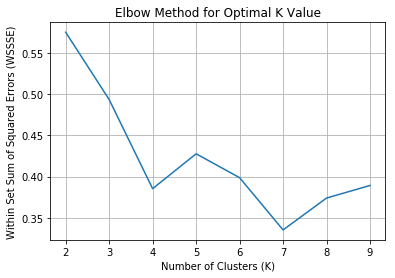

In [68]:
plt.plot(range(2, 10), wssse_values1)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K Value")
plt.grid()
plt.show()

In [69]:
kmeans1 = KMeans(k=7, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model1 = kmeans1.fit(transformed_data1)
clustered_data1 = kmeans_model1.transform(transformed_data1)

In [70]:
dataframe_viz1 = clustered_data1.toPandas()

In [71]:
dataframe_viz1

,af_danceability,af_loudness_normalized,features,scaled_features,cluster
0,0.852,0.863906,"[0.852, 0.8639058707873798]","[6.526005291630333, 12.57096734714969]",4
1,0.663,0.828607,"[0.663, 0.8286074160548063]","[5.078335103698252, 12.057328376918367]",4
2,0.761,0.859236,"[0.761, 0.8592362753832448]","[5.82897890484822, 12.503018588685668]",4
3,0.508,0.819668,"[0.508, 0.8196675985376793]","[3.891092356981466, 11.927242266964221]",2
4,0.899,0.823753,"[0.899, 0.8237534945162974]","[6.8860079309573585, 11.98669743062024]",0
5,0.776,0.802095,"[0.776, 0.8020951737273817]","[5.943873364207909, 11.671540360112772]",0
6,0.588,0.733403,"[0.588, 0.7334029676507634]","[4.503862806899807, 10.671978360602559]",3
7,0.832,0.786858,"[0.832, 0.7868575466191514]","[6.372812679150747, 11.44981283249333]",0
8,0.736,0.887684,"[0.736, 0.8876839421215938]","[5.637488139248738, 12.916969577749379]",4
9,0.721,0.748364,"[0.721, 0.7483641055574329]","[5.522593679889049, 10.889682606470839]",3


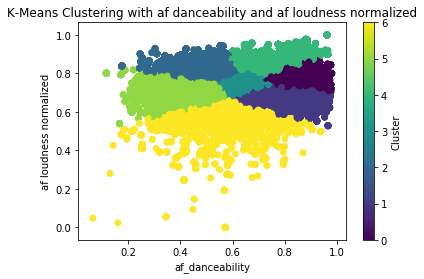

In [72]:
plt.scatter(dataframe_viz1["af_danceability"], dataframe_viz1["af_loudness_normalized"], c=dataframe_viz1["cluster"])
plt.xlabel("af_danceability")
plt.ylabel("af loudness normalized")
plt.title("K-Means Clustering with af danceability and af loudness normalized")
plt.colorbar().set_label("Cluster")
plt.show()

In [109]:
#cluster 0 has af_danceability between 0.7 and 1.0 and af_loudness_normalizied between 0.7 and 0.8 
#cluster 1 has af_danceability between 0.6 and 1.0 and af_loudness_normalized between 0.5 and 0.7 
#cluster 2 has af_danceability between 0.2 and 0.6 and af_loudness_normalizied between 0.8 and 1.0 
#cluster 3 has af_danceability between 0.6 and 0.8 and af_loudness_normalizied between 0.6 and 0.8 
#cluster 4 has af_danceability between 0.6 and 1.0 and af_loudness_normalizied between 0.6 and 1.0 
#cluster 5 has af_danceability between 0.2 and 0.6 and af_loudness_normalized between 0.6 and 0.8 
#cluster 6 has af_denacability betwen 0.0 and 1.0 and af_loudness_normalized between 0.0 and 0.6  

In [74]:
finalcluster2 = df3_normalized.select("af_energy", "af_speechiness") 

In [75]:
required_features2 = ["af_energy", "af_speechiness"]

In [76]:
assembler2 = VectorAssembler(inputCols=required_features2, outputCol="features")
transformed_data2 = assembler2.transform(finalcluster2)
transformed_data2.show() 

+---------+--------------+--------------+
|af_energy|af_speechiness|      features|
+---------+--------------+--------------+
|    0.773|        0.0776|[0.773,0.0776]|
|     0.92|         0.226|  [0.92,0.226]|
|    0.838|        0.0502|[0.838,0.0502]|
|    0.687|         0.326| [0.687,0.326]|
|    0.626|         0.292| [0.626,0.292]|
|    0.669|        0.0638|[0.669,0.0638]|
|    0.682|         0.173| [0.682,0.173]|
|    0.772|           0.1|   [0.772,0.1]|
|    0.964|         0.129| [0.964,0.129]|
|    0.687|        0.0782|[0.687,0.0782]|
|    0.954|         0.119| [0.954,0.119]|
|    0.929|        0.0532|[0.929,0.0532]|
|    0.701|         0.106| [0.701,0.106]|
|    0.889|        0.0939|[0.889,0.0939]|
|    0.838|        0.0529|[0.838,0.0529]|
|    0.917|         0.159| [0.917,0.159]|
|    0.908|         0.103| [0.908,0.103]|
|    0.718|        0.0576|[0.718,0.0576]|
|    0.798|        0.0705|[0.798,0.0705]|
|    0.909|         0.166| [0.909,0.166]|
+---------+--------------+--------

In [77]:
scaler2 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model2 = scaler2.fit(transformed_data2)
transformed_data2 = scaler_model2.transform(transformed_data2)

In [78]:
wssse_values2 = []
evaluator2 = ClusteringEvaluator()

In [79]:
for i in range(2, 10):
    KMeans_mod2 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fit2 = KMeans_mod2.fit(transformed_data2)
    output2 = KMeans_fit2.transform(transformed_data2)
    score2 = evaluator2.evaluate(output2)
    wssse_values2.append(score2)
    print("Silhouette Score:", score2)

Silhouette Score: 0.6062225358803529
Silhouette Score: 0.6222510478963655
Silhouette Score: 0.5132056240138658
Silhouette Score: 0.5667432463997534
Silhouette Score: 0.5527228293715927
Silhouette Score: 0.4998254159107387
Silhouette Score: 0.5392575133067082
Silhouette Score: 0.5344857637064463


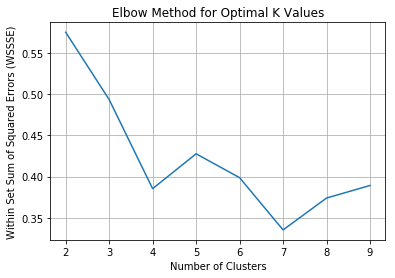

In [80]:
plt.plot(range(2, 10), wssse_values1)
plt.xlabel("Number of Clusters")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K Values")
plt.grid()
plt.show()

In [81]:
kmeans2 = KMeans(k=7, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model2 = kmeans2.fit(transformed_data2)
clustered_data2 = kmeans_model2.transform(transformed_data2)

In [82]:
clustered_data2.show()

+---------+--------------+--------------+--------------------+-------+
|af_energy|af_speechiness|      features|     scaled_features|cluster|
+---------+--------------+--------------+--------------------+-------+
|    0.773|        0.0776|[0.773,0.0776]|[4.78036366795495...|      4|
|     0.92|         0.226|  [0.92,0.226]|[5.68943670700977...|      2|
|    0.838|        0.0502|[0.838,0.0502]|[5.18233473964586...|      0|
|    0.687|         0.326| [0.687,0.326]|[4.24852501925621...|      5|
|    0.626|         0.292| [0.626,0.292]|[3.87129062890012...|      5|
|    0.669|        0.0638|[0.669,0.0638]|[4.13720995324949...|      3|
|    0.682|         0.173| [0.682,0.173]|[4.21760416758768...|      2|
|    0.772|           0.1|   [0.772,0.1]|[4.77417949762124...|      4|
|    0.964|         0.129| [0.964,0.129]|[5.96154020169285...|      0|
|    0.687|        0.0782|[0.687,0.0782]|[4.24852501925621...|      3|
|    0.954|         0.119| [0.954,0.119]|[5.89969849835578...|      0|
|    0

In [83]:
dataframe_vis2 = clustered_data2.toPandas()

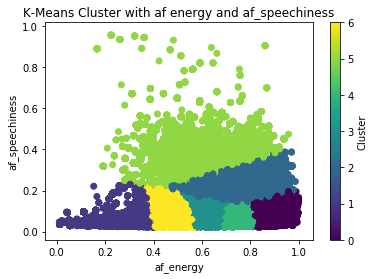

In [85]:
plt.scatter(dataframe_vis2["af_energy"], dataframe_vis2["af_speechiness"], c=dataframe_vis2["cluster"])
plt.xlabel("af_energy")
plt.ylabel("af_speechiness")
plt.title("K-Means Cluster with af energy and af_speechiness")
plt.colorbar().set_label("Cluster")
plt.show()

In [133]:
#cluster 0: the af energy was between 0.8 and 1.0 and af_speechiness is between 0 and 0.2 
#cluster 1: the af energy was between 0.0 and 0.4 and af_speechiness is beween 0.0 and 0.2 
#cluster 2: the af energy was between 0.6 and 1.0 and af_speechiness is between 0.2 and 0.4
#cluster 3: the af energy was between 0.6 and 0.7 and af_speechiness is between 0.6 and 0.7
#cluster 4: the af energy wsa between 0.7 and 0.8 and af speechines is between 0.0 and 0.2 
#cluster 5: the af energy is between 0.2 and 1.0 and af speechiness is between 0.2 and 1.0 
#cluster 6: the af enregy is between 0.4 and 0.6 and af speeciness is between 0.0 and 0.2 

In [89]:
finalcluster3 = df3_normalized.select("af_acousticness", "af_energy") 

In [90]:
required_features3 = ["af_acousticness", "af_energy"]

In [91]:
assemblerC3 = VectorAssembler(inputCols=required_features3, outputCol="features")
transformed_dataC3 = assemblerC3.transform(finalcluster3)
transformed_dataC3.show()

+---------------+---------+--------------+
|af_acousticness|af_energy|      features|
+---------------+---------+--------------+
|          0.187|    0.773| [0.187,0.773]|
|        0.00431|     0.92|[0.00431,0.92]|
|            0.4|    0.838|   [0.4,0.838]|
|          0.551|    0.687| [0.551,0.687]|
|          0.076|    0.626| [0.076,0.626]|
|          0.142|    0.669| [0.142,0.669]|
|         0.0851|    0.682|[0.0851,0.682]|
|         0.0559|    0.772|[0.0559,0.772]|
|          0.198|    0.964| [0.198,0.964]|
|         0.0998|    0.687|[0.0998,0.687]|
|         0.0244|    0.954|[0.0244,0.954]|
|          0.171|    0.929| [0.171,0.929]|
|          0.132|    0.701| [0.132,0.701]|
|         0.0673|    0.889|[0.0673,0.889]|
|          0.547|    0.838| [0.547,0.838]|
|          0.117|    0.917| [0.117,0.917]|
|         0.0858|    0.908|[0.0858,0.908]|
|         0.0784|    0.718|[0.0784,0.718]|
|          0.126|    0.798| [0.126,0.798]|
|          0.256|    0.909| [0.256,0.909]|
+----------

In [92]:
scalerC3 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_modelC3 = scalerC3.fit(transformed_dataC3)
transformed_dataC3 = scaler_modelC3.transform(transformed_dataC3) 

In [93]:
wssse_valuesC3 = []
evaluatorC3 = ClusteringEvaluator()

In [94]:
for i in range(2, 10):
    KMeans_modC3 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC3 = KMeans_modC3.fit(transformed_dataC3)
    outputC3 = KMeans_fitC3.transform(transformed_dataC3)
    scoreC3 = evaluatorC3.evaluate(outputC3)
    wssse_valuesC3.append(scoreC3)
    print("Silhouette Scores:", scoreC3)

Silhouette Scores: 0.7420277803769102
Silhouette Scores: 0.5242509216228488
Silhouette Scores: 0.5696396310464363
Silhouette Scores: 0.4747916542741543
Silhouette Scores: 0.47969243990675925
Silhouette Scores: 0.4830571979152273
Silhouette Scores: 0.5073968027535389
Silhouette Scores: 0.49751232199595186


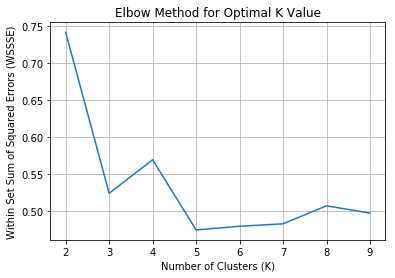

In [95]:
plt.plot(range(2, 10), wssse_valuesC3)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K Value")
plt.grid()
plt.show()

In [97]:
kmeansC3 = KMeans(k=5, featuresCol="scaled_features", predictionCol="cluster")
kmeans_modelC3 = kmeansC3.fit(transformed_dataC3)
clustered_dataC3 = kmeans_modelC3.transform(transformed_dataC3)

In [98]:
clustered_dataC3.show()

+---------------+---------+--------------+--------------------+-------+
|af_acousticness|af_energy|      features|     scaled_features|cluster|
+---------------+---------+--------------+--------------------+-------+
|          0.187|    0.773| [0.187,0.773]|[0.80940093210278...|      0|
|        0.00431|     0.92|[0.00431,0.92]|[0.01865517656343...|      0|
|            0.4|    0.838|   [0.4,0.838]|[1.73133889219848...|      4|
|          0.551|    0.687| [0.551,0.687]|[2.38491932400340...|      4|
|          0.076|    0.626| [0.076,0.626]|[0.32895438951771...|      3|
|          0.142|    0.669| [0.142,0.669]|[0.61462530673046...|      3|
|         0.0851|    0.682|[0.0851,0.682]|[0.36834234931522...|      3|
|         0.0559|    0.772|[0.0559,0.772]|[0.24195461018473...|      0|
|          0.198|    0.964| [0.198,0.964]|[0.85701275163824...|      0|
|         0.0998|    0.687|[0.0998,0.687]|[0.43196905360352...|      3|
|         0.0244|    0.954|[0.0244,0.954]|[0.10561167242410...| 

In [99]:
dataframe3_viz = clustered_dataC3.toPandas()

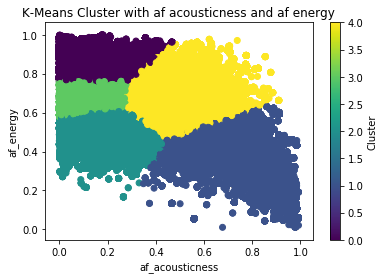

In [100]:
plt.scatter(dataframe3_viz["af_acousticness"], dataframe3_viz["af_energy"], c=dataframe3_viz["cluster"])
plt.xlabel("af_acousticness")
plt.ylabel("af_energy")
plt.title("K-Means Cluster with af acousticness and af energy")
plt.colorbar().set_label("Cluster")
plt.show()

In [ ]:
#cluster 0: af acousticness is between 0.0 and 0.4 and the af energy is between 0.8 and 1.0 
#cluster 1: af acousticness is between 0.4 and 1.0 and the af energy is between 0.0 and 0.6 
#cluster 2: af acousticness is between 0.0 and 0.4 and the af energy is between 0.2 and 0.6
#cluster 3: af acousticness is between 0.0 and 0.3 and the af energy is between 0.6 and 0.8 
#cluster 4: af acousticness is between 0.3 and 1.0 and the af energy is between 0.5 and 1.0 

In [117]:
finalcluster4 = df3_normalized.select("af_energy","af_loudness_normalized") 

In [118]:
required_features4 = ["af_energy", "af_loudness_normalized"] 

In [120]:
assemblerC4 = VectorAssembler(inputCols=required_features4, outputCol="features")
transformed_dataC4 = assemblerC4.transform(finalcluster4)
transformed_dataC4.show()

+---------+----------------------+--------------------+
|af_energy|af_loudness_normalized|            features|
+---------+----------------------+--------------------+
|    0.773|    0.8639058707873798|[0.773,0.86390587...|
|     0.92|    0.8286074160548063|[0.92,0.828607416...|
|    0.838|    0.8592362753832448|[0.838,0.85923627...|
|    0.687|    0.8196675985376793|[0.687,0.81966759...|
|    0.626|    0.8237534945162974|[0.626,0.82375349...|
|    0.669|    0.8020951737273817|[0.669,0.80209517...|
|    0.682|    0.7334029676507634|[0.682,0.73340296...|
|    0.772|    0.7868575466191514|[0.772,0.78685754...|
|    0.964|    0.8876839421215938|[0.964,0.88768394...|
|    0.687|    0.7483641055574329|[0.687,0.74836410...|
|    0.954|    0.8976375533777764|[0.954,0.89763755...|
|    0.929|    0.9309391416546342|[0.929,0.93093914...|
|    0.701|    0.7728487604067464|[0.701,0.77284876...|
|    0.889|    0.8302356302417745|[0.889,0.83023563...|
|    0.838|    0.8360419034745477|[0.838,0.83604

In [121]:
scalerC4 = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_modelC4 = scalerC4.fit(transformed_dataC4)
transformed_dataC4 = scaler_modelC4.transform(transformed_dataC4)

In [122]:
wssse_valuesC4 = []
evaluatorC4 = ClusteringEvaluator()

In [124]:
for i in range(2, 10):
    KMeans_modC4 = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fitC4 = KMeans_modC4.fit(transformed_dataC4)
    outputC4 = KMeans_fitC4.transform(transformed_dataC4)
    scoreC4 = evaluatorC4.evaluate(outputC4)
    wssse_valuesC4.append(scoreC4)
    print("Silhouette Score:", scoreC4)

Silhouette Score: 0.6693536406086752
Silhouette Score: 0.5541055650053771
Silhouette Score: 0.4663443278624399
Silhouette Score: 0.387403147720667
Silhouette Score: 0.39458532460361784
Silhouette Score: 0.34243550350042234
Silhouette Score: 0.34221721514547265
Silhouette Score: 0.3321335464949175


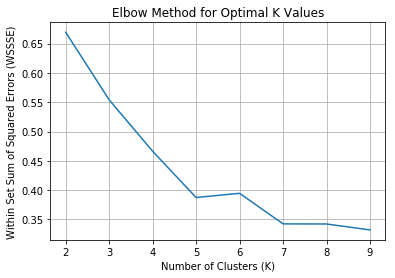

In [125]:
plt.plot(range(2, 10), wssse_valuesC4)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K Values")
plt.grid()
plt.show()

In [127]:
kmeansC4 = KMeans(k=7, featuresCol="scaled_features", predictionCol="cluster")
kmeans_modelC4 = kmeansC4.fit(transformed_dataC4)
clustered_dataC4 = kmeans_modelC4.transform(transformed_dataC4)

In [128]:
clustered_dataC4.show()

+---------+----------------------+--------------------+--------------------+-------+
|af_energy|af_loudness_normalized|            features|     scaled_features|cluster|
+---------+----------------------+--------------------+--------------------+-------+
|    0.773|    0.8639058707873798|[0.773,0.86390587...|[4.78036366795495...|      3|
|     0.92|    0.8286074160548063|[0.92,0.828607416...|[5.68943670700977...|      3|
|    0.838|    0.8592362753832448|[0.838,0.85923627...|[5.18233473964586...|      3|
|    0.687|    0.8196675985376793|[0.687,0.81966759...|[4.24852501925621...|      0|
|    0.626|    0.8237534945162974|[0.626,0.82375349...|[3.87129062890012...|      0|
|    0.669|    0.8020951737273817|[0.669,0.80209517...|[4.13720995324949...|      0|
|    0.682|    0.7334029676507634|[0.682,0.73340296...|[4.21760416758768...|      5|
|    0.772|    0.7868575466191514|[0.772,0.78685754...|[4.77417949762124...|      4|
|    0.964|    0.8876839421215938|[0.964,0.88768394...|[5.9615402

In [129]:
dataframe4_viz = clustered_dataC4.toPandas()

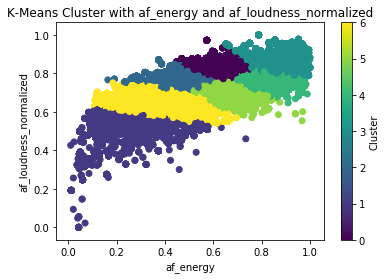

In [130]:
plt.scatter(dataframe4_viz["af_energy"], dataframe4_viz["af_loudness_normalized"], c=dataframe4_viz["cluster"])
plt.xlabel("af_energy")
plt.ylabel("af_loudness_normalized")
plt.title("K-Means Cluster with af_energy and af_loudness_normalized")
plt.colorbar().set_label("Cluster")
plt.show()

In [ ]:
#cluster 0: af energy is between 0.5 and 0.8 and af loudness normalized is between 0.7 and 0.9
#cluster 1: af energy is between 0.0 and 0.6 and af loudness normalized is between 0.0 and 0.6 
#cluster 2: af energy is between 0.2 and 0.6 and af loudness normalized is between 0.7 and 0.8 
#cluster 3: af energy is between 0.6 and 1.0 and af loudness normalized is between 0.8 and 1.0 
#cluster 4: af energy is between 0.7 and 1.0 and af loudness normalized is between 0.6 and 0.8
#cluster 5: af energy is between 0.6 and 1.0 and af loudness normalized is between 0.6 and 0.8
#cluster 6: af energy is between 0.0 and 0.6 and af loudness normlaized is between 0.6 and 0.8